<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [2]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [3]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

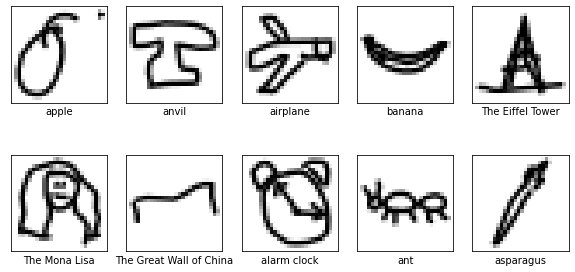

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [5]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [23]:
import numpy
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [24]:
# Define the number of neurons for our hidden layers
def create_model(units=32, learning_rate=0.2):
  # create model
  model = Sequential()
  optimizer = SGD(learning_rate=learning_rate)

  # First hidden layer 
  model.add(Dense(units, # number of neurons in our hidden layer
                  input_dim=784, # implicitly declaring the input layer  
                  activation='relu'))  

  # output layer 
  model.add(Dense(10, # 10 neurons in output layer for the number of categories
                  activation='softmax'))

  # Compile model
  model.compile(loss='sparse_categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])
  
  return model

In [25]:
baseline = create_model(24, 0.25)

baseline.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                18840     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                250       
Total params: 19,090
Trainable params: 19,090
Non-trainable params: 0
_________________________________________________________________


In [26]:
baseline = create_model(24, 0.25).fit(X,
                                      y,
                                      epochs=30,
                                      validation_split= 0.2
                                      )

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 4753488.8509 - accuracy: 0.0998 - val_loss: 2.4053 - val_accuracy: 0.0995
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3045 - accuracy: 0.1010 - val_loss: 2.4046 - val_accuracy: 0.0977
Epoch 3/30
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3045 - accuracy: 0.1004 - val_loss: 2.4068 - val_accuracy: 0.0988
Epoch 4/30
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3044 - accuracy: 0.1019 - val_loss: 2.4056 - val_accuracy: 0.0973
Epoch 5/30
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3046 - accuracy: 0.1008 - val_loss: 2.4045 - val_accuracy: 0.1011
Epoch 6/30
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3044 - accuracy: 0.1005 - val_loss: 2.4051 - val_accuracy: 0.1021
Epoch 7/30
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3044 - accuracy: 0.0999 - val_loss: 2.4049 - val_acc

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [27]:
baseline.history

{'accuracy': [0.09910000115633011,
  0.10028749704360962,
  0.09998749941587448,
  0.10145000368356705,
  0.09896250069141388,
  0.09965000301599503,
  0.10046249628067017,
  0.10011249780654907,
  0.09933750331401825,
  0.09943749755620956,
  0.09861250221729279,
  0.09889999777078629,
  0.0982000008225441,
  0.09870000183582306,
  0.09933750331401825,
  0.10041250288486481,
  0.09803750365972519,
  0.09958750009536743,
  0.09839999675750732,
  0.0980750024318695,
  0.10232499986886978,
  0.09872499853372574,
  0.09943749755620956,
  0.10058750212192535,
  0.10100000351667404,
  0.09948749840259552,
  0.09866250306367874,
  0.0996749997138977,
  0.09892500191926956,
  0.10122500360012054],
 'loss': [725212.875,
  2.3045084476470947,
  2.3044655323028564,
  2.304394245147705,
  2.304500102996826,
  2.3043899536132812,
  2.3044064044952393,
  2.304274082183838,
  2.3044979572296143,
  2.3043298721313477,
  2.304476022720337,
  2.3044040203094482,
  2.304542303085327,
  2.304449081420898

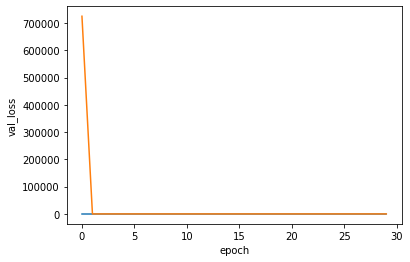

In [28]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [36]:
from tensorflow.keras.optimizers import Adam

def create_model_adam(units=32):
  # create model
  model = Sequential()
  optimizer = Adam()

  # First hidden layer 
  model.add(Dense(units, # number of neurons in our hidden layer
                  input_dim=784, # implicitly declaring the input layer  
                  activation='relu'))  

  # Second hidden layer 
  model.add(Dense(units, # number of neurons in our hidden layer
                  activation='relu'))  

  # output layer 
  model.add(Dense(10, # 10 neurons in output layer for the number of categories
                  activation='softmax'))

  # Compile model
  model.compile(loss='sparse_categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])
  
  return model

In [37]:
adam = create_model_adam(32).fit(X,
                                 y,
                                 epochs=30,
                                 validation_split=0.2
                                )

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 5.2294 - accuracy: 0.2840 - val_loss: 1.4354 - val_accuracy: 0.4676
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.3467 - accuracy: 0.5239 - val_loss: 1.2308 - val_accuracy: 0.5588
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1949 - accuracy: 0.5886 - val_loss: 1.1272 - val_accuracy: 0.6306
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1173 - accuracy: 0.6282 - val_loss: 1.1172 - val_accuracy: 0.6374
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0757 - accuracy: 0.6452 - val_loss: 1.1210 - val_accuracy: 0.6443
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0369 - accuracy: 0.6611 - val_loss: 1.0204 - val_accuracy: 0.6930
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9853 - accuracy: 0.6819 - val_loss: 0.9896 - val_accuracy:

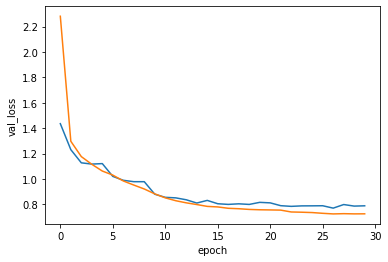

In [38]:
df = pd.DataFrame.from_records(adam.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
  * For the model fit above a well suited `loss function` is `sparse_categorical_crossentropy` because there are more than two categories for the model to predict. 
  * For the model example (predicting 0/1) a well suited loss function is `BinaryCrossentropy` as it is works well for predicting one of two category options.
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
  * The loss function is used in the model to optimize the model overall. The metric is used to evaluate the performance of the model as a whole. Both are needed in Keras in order to make the most optimized and best performing model.
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 
  * SGD is no longer the algorithm dejour because it may take longer than newer optimizers to find the minimum. Additionally it is not adaptive and therefore may get stuck in a saddle point rather than the true minimum. Adam is adaptive and acts faster. 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)